# Neural network

layer 0 - input layer

layer 1:(n-1) - hidden layers

layer n - output layer

neurons in the layer are called hidden units

## Neurons

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

#### data

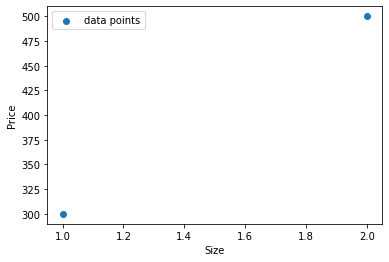

In [41]:
x=np.array([[1],[2]])
y=np.array([[300],[500]])
plt.scatter(x,y,label='data points')
plt.xlabel('Size')
plt.ylabel('Price')
plt.legend()

### Neuron without activation - Linear regression

$$ f_{w,b}(x^{(i)}) = w \cdot x^{(i)} + b $$

In [21]:
linear_layer=tf.keras.layers.Dense(units=1,activation='linear')
linear_layer.get_weights()

[]

Prediction with randomly generated weights:

In [23]:
a1=linear_layer(x[0].reshape(1,1))
a1

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.5861629]], dtype=float32)>

Randomly initialized weights:

In [24]:
w,b=linear_layer.get_weights()
print(f'w: {w}, b: {b}')

w: [[-0.5861629]], b: [0.]


Seting own weights:

In [49]:
set_w=np.array([[180]])
set_b=np.array([110])
linear_layer.set_weights([set_w,set_b])
linear_layer.get_weights()

[array([[180.]], dtype=float32), array([110.], dtype=float32)]

Now that the layer has its weights set, we can compute the prediction with given input:

In [50]:
a1=linear_layer(x[0].reshape(1,1))
print(f'linear layer: {a1}')
equation=np.dot(set_w,x[0].reshape(1,1))+set_b
print(f'traditional calculation: {equation}')

linear layer: [[290.]]
traditional calculation: [[290]]


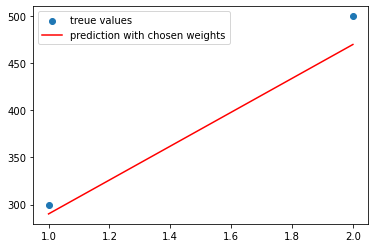

In [58]:
prediction_tf=linear_layer(x)
plt.scatter(x,y,label='treue values')
plt.plot(x,prediction_tf,label='prediction with chosen weights',c='r')
plt.legend()

### Neuron with sigmoid activation - Logistic regression

$$ f_{w,b}(x^{(i)}) = \dfrac {1}{1+e^{-( w \cdot x^{(i)} + b)}} $$

#### data

In [61]:
x=np.arange(6).reshape(-1,1)
y=np.array([0,0,0,1,1,1]).reshape(-1,1)
pos=y==1
neg=y==0
x[pos]

array([3, 4, 5])

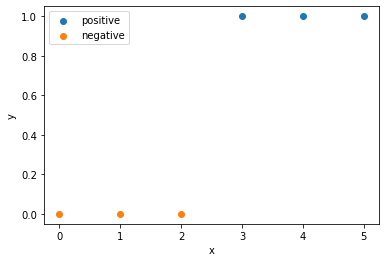

In [66]:
plt.scatter(x[pos],y[pos],label='positive')
plt.scatter(x[neg],y[neg],label='negative')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

#### Sequential model approach:

In [87]:
model=Sequential(
[
    tf.keras.layers.Dense(1,input_dim=1,activation='sigmoid',name='L1')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
L1 (Dense)                   (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [88]:
logistic_layer=model.get_layer('L1')
w,b=logistic_layer.get_weights()
print(w,b)

[[-1.7300153]] [0.]


In [89]:
w,b=model.get_weights()
print(w,b)

[[-1.7300153]] [0.]


#### Pure layer approach:

In [77]:
logistic_layer=tf.keras.layers.Dense(1,input_dim=1,activation='sigmoid',name='L1')
logistic_layer(x[0].reshape(1,1))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.5]], dtype=float32)>

In [78]:
w,b=logistic_layer.get_weights()
print(w,b)

[[-0.56538105]] [0.]


^^ values of weights are randomly generated

Seting own weights:

In [85]:
model.set_weights([set_w,set_b])
model.get_weights()

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]

In [81]:
set_w=np.array([[2]])
set_b=np.array([-4.5])
logistic_layer.set_weights([set_w,set_b])
logistic_layer.get_weights()

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]

Now that the layer has its weights set, we can compute the prediction with given input:

In [86]:
sequential=model.predict(x[0].reshape(1,1))
print(f'sequential model: {sequential}')
a1=logistic_layer(x[0].reshape(1,1))
print(f'logistic layer: {a1}')
equation=1/(1+np.exp(-(np.dot(set_w,x[0].reshape(1,1))+set_b)))
print(f'traditional calculation: {equation}')

sequential model: [[0.01098692]]
logistic layer: [[0.01098692]]
traditional calculation: [[0.01098694]]


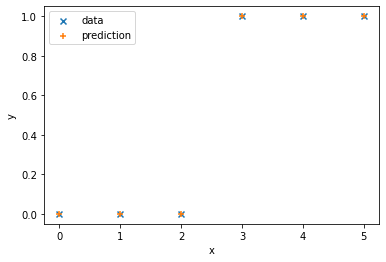

In [99]:
prediction=logistic_layer(x)
plt.scatter(x,y,label='data',marker='x')
plt.scatter(x,y,label='prediction',marker='+')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## TensorFlow

numpy vs TensorFlow

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid
import matplotlib.pyplot as plt

numpy sotres data as rows:

In [6]:
# 3 columns with 2 rows
x=np.array([[1,3,2],[2,3,4]])
x

array([[1, 3, 2],
       [2, 3, 4]])

In [14]:
# 1x2  one row, two columns
np.array([[200,17]])

array([[200,  17]])

In [15]:
# 2x1  one column two rows
np.array([[200],[17]])

array([[200],
       [ 17]])

In [16]:
# 1D vector, no rows and no columns
np.array([200,17])

array([200,  17])

#### MODEL

In [20]:
x=np.load('data/coffe_x.npy')
y=np.load('data/coffe_y.npy')

normalization

In [4]:
norm_l=tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x)
x_norm=norm_l(x)
print(f'Temp before morm: min: {np.min(x[:,0]):0.2f} max: {np.max(x[:,0]):0.2f}')
print(f'Duration before morm: {np.min(x[:,1]):0.2f} max: {np.max(x[:,1]):0.2f}')
print('*********')
print(f'Temp after morm: min: {np.min(x_norm[:,0]):0.2f} max: {np.max(x_norm[:,0]):0.2f}')
print(f'Duration after morm: {np.min(x_norm[:,1]):0.2f} max: {np.max(x_norm[:,1]):0.2f}')

Temp before morm: min: 151.32 max: 284.99
Duration before morm: 11.51 max: 15.45
*********
Temp after morm: min: -1.69 max: 1.66
Duration after morm: -1.70 max: 1.79


Tile/copy data to increase the training set size:

In [21]:
X=np.tile(x_norm,(1000,1))
Y=np.tile(y,(1000,1))

In [13]:
tf.random.set_seed(1234)
model=Sequential(
    [
        tf.keras.layers.Input(shape=(2,)),
        tf.keras.layers.Dense(3,activation='sigmoid',name='layer1'),
        tf.keras.layers.Dense(1,activation='sigmoid',name='layer2')
    ]
)

`tf.keras.layers.Input(shape=(2,))` specifies the expected shape of ht einput. This can be done automaticly by tf during model.fit operation.

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [17]:
layer1_num_params=2*3+3 # w1 parameters + b1 parameters
layer2_num_params=3*1+1 # w2 parameters + b2 parameter
print('layer 1 parameters: ',layer1_num_params,'\nlayer 2 parameters: ',layer2_num_params)

layer 1 parameters:  9 
layer 2 parameters:  4


In [18]:
w1,b1=model.get_layer('layer1').get_weights()
w2,b2=model.get_layer('layer2').get_weights()
print(f'w1: {w1} \nb1: {b1}')
print(f'w2: {w2} \nb2: {b2}')

w1: [[ 0.08334005 -0.29660565  0.17884266]
 [-0.56124383 -0.15262699  0.8899205 ]] 
b1: [0. 0. 0.]
w2: [[-0.4277674 ]
 [-0.88499916]
 [ 0.3626454 ]] 
b2: [0.]


In [19]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
)

In [22]:
model.fit(X,Y,epochs=10)

Epoch 1/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.1783
Epoch 2/10
6250/6250 [==============================] - 6s 1ms/step - loss: 0.1165
Epoch 3/10
6250/6250 [==============================] - 6s 1ms/step - loss: 0.0426
Epoch 4/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0159
Epoch 5/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0103
Epoch 6/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0072
Epoch 7/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0052
Epoch 8/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0037
Epoch 9/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0027
Epoch 10/10
6250/6250 [==============================] - 7s 1ms/step - loss: 0.0021


For efficiency training data is broken into batches. Default size of batch in TensoeFlow is 32. There are 200000 rows in the dataset which means 6250 batches. Notation 6250/6250 describes which batch is being executed.

In [23]:
w1,b1=model.get_layer('layer1').get_weights()
w2,b2=model.get_layer('layer2').get_weights()
print('Adjusted weights:')
print(f'w1: {w1} \nb1: {b1}')
print(f'w2: {w2} \nb2: {b2}')

Adjusted weights:
w1: [[ -0.05711636  14.364858   -10.988158  ]
 [ -8.806647    11.94994     -0.27568746]] 
b1: [-11.009074    1.8008635 -11.985656 ]
w2: [[-45.247414]
 [-42.536713]
 [-50.55347 ]] 
b2: [26.351244]


Weights could be set manually:

In [24]:
#model.get_layer('layer1').set_weights([w1,b1])
#model.get_layer('layer2').set_weights([w2,b2])

In [27]:
X_test=np.array([[200,13.9],[200,17]])
X_test=norm_l(X_test)
prediction=model.predict(X_test)
print(f'Predictions: \n{prediction}')

1/1 [==============================] - 0s 25ms/step
Predictions: 
[[9.8753923e-01]
 [9.1421185e-08]]


We can apply a treshold to the outcome:

In [28]:
y_hat=np.zeros_like(prediction)
for i in range(len(prediction)):
    if prediction[i]<0.5:
        y_hat[i]=0
    else:
        y_hat[i]=1
print(f'decisions: \n{y_hat}')

decisions: 
[[1.]
 [0.]]


## NumPy

Building Dense layer using NumPy

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [36]:
x=np.load('data/coffe_x.npy')
y=np.load('data/coffe_y.npy')

normalization:

In [37]:
norm_l=tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(x)
x_norm=norm_l(x)
print(f'Temp before morm: min: {np.min(x[:,0]):0.2f} max: {np.max(x[:,0]):0.2f}')
print(f'Duration before morm: {np.min(x[:,1]):0.2f} max: {np.max(x[:,1]):0.2f}')
print('*********')
print(f'Temp after morm: min: {np.min(x_norm[:,0]):0.2f} max: {np.max(x_norm[:,0]):0.2f}')
print(f'Duration after morm: {np.min(x_norm[:,1]):0.2f} max: {np.max(x_norm[:,1]):0.2f}')

Temp before morm: min: 151.32 max: 284.99
Duration before morm: 11.51 max: 15.45
*********
Temp after morm: min: -1.69 max: 1.66
Duration after morm: -1.70 max: 1.79


In [39]:
def sigmoid(z):
    y=1/(1+np.exp(-z))
    return y

In [75]:
def my_dense(a_in,W,b):
    """
    Computes dense layer.
    
    Parameters:
    -----------
    a_in (ndarray (n,)): Data, 1 example
    W (ndarray (n,j)): Weight matrix, n features per unit, j units
    b (ndarray (j,)): bias vector, j units
    
    Returns:
    --------
    a_out (ndarray (j,)): j units
    
    Examples:
    ---------
    >>> my_dense([1,2,3])
    [0.67]
    """
    weights,neurons=W.shape
    a_out=np.zeros(neurons)
    for j in range(neurons):
        z=np.dot(W[:,j],a_in)+b[j]
        a_out[j]=sigmoid(z)
    return a_out

Alternative version with vectorization:

In [ ]:
def my_dense(a_in,W,B,g):
    z=np.matmul(a_in,W)+b
    a_out=g(z)
    return a_out

In [76]:
def my_sequential(x,W1,b1,W2,b2):
    a1=my_dense(x,W1,b1)
    a2=my_dense(a1,W2,b2)
    return a2

In [77]:
W1= np.array([[ -0.05711636,14.364858,-10.988158  ],[ -8.806647,11.94994,-0.27568746]])
b1= np.array([-11.009074,1.8008635,-11.985656 ])
W2= np.array([[-45.247414],[-42.536713],[-50.55347 ]])
b2= np.array([26.351244])

In [78]:
def my_predict(X,W1,b1,W2,b2):
    m=X.shape[0]
    p=np.zeros((m,1))
    for i in range(m):
        p[i]=my_sequential(X[i],W1,b1,W2,b2)
    return p

In [79]:
X_test=np.array([[200,13.9],[200,17]])
X_test=norm_l(X_test)
prediction=my_predict(X_test,W1,b1,W2,b2)
print(f'Predictions: \n{prediction}')

Predictions: 
[[9.87539190e-01]
 [9.14210402e-08]]


In [80]:
y_hat=np.zeros_like(prediction)
for i in range(len(prediction)):
    if prediction[i]<0.5:
        y_hat[i]=0
    else:
        y_hat[i]=1
print(f'decisions: \n{y_hat}')

decisions: 
[[1.]
 [0.]]


In [81]:
W1.shape

(2, 3)

### Practice Lab

In [1]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
(X,Y), (test_X, test_Y) = mnist.load_data()
train_filter = np.where((Y == 0 ) | (Y == 1))
test_filter = np.where((test_Y == 0) | (test_Y == 1))
X, Y = X[train_filter], Y[train_filter]
test_X, test_y = test_X[test_filter], test_Y[test_filter]

In [3]:
X_reshaped=X.reshape(12665,784)

In [4]:
X_reshaped.shape

(12665, 784)

In [7]:
X.shape

(12665, 28, 28)

In [5]:
Y.shape

(12665,)

0


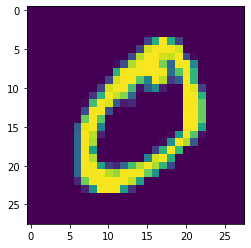

In [6]:
print(Y[0])
plt.imshow(X[0])

Images are of the size 28x28 therefore the input is 784

In [8]:
model=tf.keras.models.Sequential(
    [
        tf.keras.layers.Input(shape=(784,)),
        tf.keras.layers.Dense(25,activation='sigmoid'),
        tf.keras.layers.Dense(15,activation='sigmoid'),
        tf.keras.layers.Dense(1,activation='sigmoid')
    
    ]
)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                19625     
                                                                 
 dense_1 (Dense)             (None, 15)                390       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 20,031
Trainable params: 20,031
Non-trainable params: 0
_________________________________________________________________


In [10]:
[layer1,layer2,layer3]=model.layers
W1,b1=layer1.get_weights()
W2,b2=layer2.get_weights()
W3,b3=layer3.get_weights()
print(f'W1: {W1.shape} b1: {b1.shape}')
print(f'W2: {W2.shape} b2: {b2.shape}')
print(f'W3: {W3.shape} b3: {b3.shape}')

W1: (784, 25) b1: (25,)
W2: (25, 15) b2: (15,)
W3: (15, 1) b3: (1,)


In [11]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001)
)

In [78]:
model.fit(X_reshaped,Y,epochs=20)

Epoch 1/20
396/396 [==============================] - 1s 2ms/step - loss: 0.1823
Epoch 2/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0317
Epoch 3/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0156
Epoch 4/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0101
Epoch 5/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0082
Epoch 6/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0064
Epoch 7/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 8/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0053
Epoch 9/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0054
Epoch 10/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0050
Epoch 11/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 12/20
396/396 [==============================] - 1s 2ms/step - loss: 0.0047
Epoch 13/20
396/396 [====

In [84]:
p0=model.predict(X_reshaped[0].reshape(1,784))
p1=model.predict(X_reshaped[1].reshape(1,784))
print(f'true: {Y[0]}, predicted: {p0}')
print(f'true: {Y[1]}, predicted: {p1}')

1/1 [==============================] - 0s 17ms/step
true: 0, predicted: [[0.00067704]]
true: 1, predicted: [[0.99989885]]
